# **매출/수익분석 및 대시보드 기획**
---

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 매출/수익분석 및 대시보드 기획
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 대시보드 화면 설계
▶ 지표 기획 및 개발
```


## **문제상황 Introduction**
---


> **문제정의**

```
▶ 미세한 변화를 빠르게 파악하지 못하여 회사의 성장이 더뎌짐, 변화 파악을 위한 수단 부재
```  

> **기대효과**

```
▶ 매출 및 수익의 성장 저하 원인 파악, 앞으로의 변화에 빠르게 대응 가능
```

> **해결방안**

```
▶ 데이터 분석을 통한 인사이트 도출 및 다양한 지표, 시각화 자료 구축
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|Ship mode|배송유형|
|Segment|고객유형|
|Country|국가|
|City|도시|
|State|주|
|Postal Code|우편번호|
|Region|지역|
|Category|카테고리|
|Sub-Category|서브카테고리|
|Sales|판매가격|
|Quantity|수량|
|Discount|할인|
|Profit|이익|




In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/개인 프로젝트/1')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/개인 프로젝트/1'

In [ ]:
import pandas as pd
df = pd.read_csv('P_PJT01_DATA.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## **Process01**  
**┗ Data 전처리 및 EDA**  
---

### Data 전처리
---
- 데이터의 기본 정보들을 확인
    1. Data shape 확인
    2. Data type 확인
    3. Null값 확인
    4. Outlier 확인

In [ ]:
df.shape

(9993, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Profit (이익) 칼럼에 음수값 존재 확인

### Data EDA
---



In [ ]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
df.Discount.mean()

0.1562183528469929

In [ ]:
df[df.Profit < 0].Discount.mean()

0.48088722608230894

특정 상품의 높은 할인률로 인해 Profit이 음수인 것을 확인


In [ ]:
# 총 매출
total_sales = df.Sales.sum()
print('sales:', total_sales)

# 총 수익
total_profit = df.Profit.sum()
print('profit:', total_profit)

sales: 2296957.7003
profit: 286324.07369999995


간단한 데이터 탐색

---

In [ ]:
print(df.City.nunique(), df.Country.nunique(), df.State.nunique())

531 1 49


지역 관련 칼럼 데이터 형태 파악

In [ ]:
df.Segment.nunique()

3

In [ ]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df['Sub-Category'].nunique()

17

In [ ]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

지역 이외 칼럼 데이터 파악

In [ ]:
df.Profit.sum()

286324.07369999995

In [ ]:
df.Profit.mean()/df.Sales.mean()*100

12.465361188958937

In [ ]:
df['P_per_S'] = df.Profit/df.Sales *100
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,P_per_S
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


마진률 파악

In [ ]:
# 상품 하나당 평균 가격
sales_per_q = df.Sales.sum()/df.Quantity.sum()

# 상품 하나당 평균 이익
profit_per_q = df.Profit.sum()/df.Quantity.sum()

print(sales_per_q)
print(profit_per_q)

60.65215337065301
7.56050998653323


In [ ]:
# 주문 건당 평균 가격
sales_per_c = df.Sales.sum()/df.Sales.count()

# 주문 건당 평균 이익
profit_per_c = df.Profit.sum()/df.Sales.count()

print(sales_per_c)
print(profit_per_c)

229.85666969878918
28.652464094866403


## **Process02**  
**┗ Data 분석**  
---

### 지역별 판매가격과 이익
---


In [ ]:
regi_p = df.groupby('Region').Profit.mean().reset_index()
regi_p.sort_values('Profit', ascending=False)

,Region,Profit
3,West,33.836821
1,East,32.135808
2,South,28.857673
0,Central,17.092709


In [ ]:
regi_s = df.groupby('Region').Sales.mean().reset_index()
regi_s.sort_values('Sales', ascending=False)

,Region,Sales
2,South,241.803645
1,East,238.336110
3,West,226.488028
0,Central,215.772661


In [ ]:
regi_west = df[df.Region == 'West']
regi_east = df[df.Region == 'East']
regi_central = df[df.Region == 'Central']
regi_south = df[df.Region == 'South']

print('west', regi_west.Profit.mean()/regi_west.Sales.mean()*100)
print('east', regi_east.Profit.mean()/regi_east.Sales.mean()*100)
print('south', regi_south.Profit.mean()/regi_south.Sales.mean()*100)
print('central', regi_central.Profit.mean()/regi_central.Sales.mean()*100)

west 14.939783515643459
east 13.483398568882077
south 11.934341609004479
central 7.921628591177566


In [ ]:
regi_ps = df.groupby('Region').Profit.sum().reset_index()
regi_ps.sort_values('Profit', ascending=False)

,Region,Profit
3,West,108345.5009
1,East,91522.7800
2,South,46749.4303
0,Central,39706.3625


In [ ]:
regi_ss = df.groupby('Region').Sales.sum().reset_index()
regi_ss.sort_values('Sales', ascending=False)

,Region,Sales
3,West,725214.6645
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


In [ ]:
df.Region.value_counts()

Region
West       3202
East       2848
Central    2323
South      1620
Name: count, dtype: int64

지역별 마진률의 차이 존재

west 는 마진률이 높음

east 는 판매금액과 이익의 순위가 그대로

south 는 마진률이 낮음, 평균 판매금액이 높음

central 은 판매금액, 이익 낮음

### 배송 방식 분석
---

In [ ]:
df.groupby('Ship Mode').Profit.mean().sort_values(ascending=False)

Ship Mode
First Class       31.839948
Second Class      29.513214
Same Day          29.266591
Standard Class    27.494770
Name: Profit, dtype: float64

In [ ]:
df.groupby('Ship Mode').Sales.mean().sort_values(ascending=False)

Ship Mode
Same Day          236.396179
Second Class      236.085602
First Class       228.497024
Standard Class    227.583067
Name: Sales, dtype: float64

In [ ]:
firs = df[df['Ship Mode'] == 'First Class']
seco = df[df['Ship Mode'] == 'Second Class']
same = df[df['Ship Mode'] == 'Same Day']
stan = df[df['Ship Mode'] == 'Standard Class']

print('f', firs.Profit.mean()/firs.Sales.mean()*100)
print('se', seco.Profit.mean()/seco.Sales.mean()*100)
print('sa', same.Profit.mean()/same.Sales.mean()*100)
print('st', stan.Profit.mean()/stan.Sales.mean()*100)

f 13.934513177932256
se 12.501064652062604
sa 12.380314751607987
st 12.081201999438171


지역별 판매가격, 이익, 마진률과 똑같은 형태가 나옴

### 카테고리별 분석
---

In [ ]:
df.groupby('Category').Profit.mean().sort_values(ascending=False)

Category
Technology         78.752002
Office Supplies    20.318316
Furniture           8.699327
Name: Profit, dtype: float64

In [ ]:
df.groupby('Category').Sales.mean().sort_values(ascending=False)

Category
Technology         452.709276
Furniture          349.834887
Office Supplies    119.303547
Name: Sales, dtype: float64

In [ ]:
df.groupby('Category').Profit.sum().sort_values(ascending=False)

Category
Technology         145454.9481
Office Supplies    122417.8528
Furniture           18451.2728
Name: Profit, dtype: float64

In [ ]:
df.groupby('Category').Sales.sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    718803.8720
Name: Sales, dtype: float64

In [ ]:
tech = df[df['Category'] == 'Technology']
offi = df[df['Category'] == 'Office Supplies']
furn = df[df['Category'] == 'Furniture']

print('tech', tech.Profit.mean()/tech.Sales.mean()*100)
print('offi', offi.Profit.mean()/offi.Sales.mean()*100)
print('furn', furn.Profit.mean()/furn.Sales.mean()*100)

tech 17.39571207689194
offi 17.03077258882657
furn 2.486695133458887


technology, office supplies는 높은 마진률을 보이지만

furniture가 아주 낮은 마진률을 보임

### 소비자 유형별 분석
---

In [ ]:
df.groupby('Segment').Profit.mean()

Segment
Consumer       25.827796
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

### 할인률 분석
---

In [ ]:
df.groupby('Discount').Profit.mean().reset_index(name='Profit')

,Discount,Profit
0,0.00,66.899032
1,0.10,96.055074
2,0.15,27.288298
3,0.20,24.702572
4,0.30,-45.679636
5,0.32,-88.560656
6,0.40,-111.927429
7,0.45,-226.646464
8,0.50,-310.703456
9,0.60,-43.077212


할인률이 30%가 넘어가는 순간 이익이 손해가 됨




In [ ]:
df.groupby('Region').Discount.mean().sort_values(ascending=False)

Region
Central    0.240353
South      0.147253
East       0.145365
West       0.109369
Name: Discount, dtype: float64

In [ ]:
df.groupby('Ship Mode').Discount.mean().sort_values(ascending=False)

Ship Mode
First Class       0.164610
Standard Class    0.160023
Same Day          0.152394
Second Class      0.138966
Name: Discount, dtype: float64

In [ ]:
df.groupby('Category').Discount.mean().sort_values(ascending=False)

Category
Furniture          0.173923
Office Supplies    0.157311
Technology         0.132323
Name: Discount, dtype: float64

In [ ]:
df.groupby('Segment').Discount.mean().sort_values(ascending=False)

배송방식별에서 First Class 항목을 제외하고는

할인률 평균의 순위와 마진률의 순서가 일치함

할인률이 마진률에 크게 영향을 미치는 것을 알 수 있음

## **Process03**  
**┗ 대시보드 제작 및 인사이트 추출**  
---

### 대시보드 제작

---

In [ ]:
# 총 매출
total_sales = df.Sales.sum()
print('판매금액:', int(total_sales))

# 총 수익
total_profit = df.Profit.sum()
print('이    익:', int(total_profit))

print('마 진 률:',round(df.Profit.mean()/df.Sales.mean()*100, 3))

판매금액: 2296957
이    익: 286324
마 진 률: 12.465


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

reg1 = pd.DataFrame(df.groupby('Region').Sales.mean()).reset_index()
reg1 = reg1.sort_values('Region')

reg2 = pd.DataFrame(df.groupby('Region').Profit.mean()).reset_index()
reg2 = reg2.sort_values('Region')

reg3 = pd.DataFrame(df.groupby('Region').P_per_S.mean().abs()).reset_index()
reg3 = reg3.sort_values('Region')

reg4 = pd.DataFrame(df.groupby('Region').Discount.mean()).reset_index()
reg4 = reg4.sort_values('Region')

fig = make_subplots(rows=2, cols=2, subplot_titles=('지역별 판매금액 평균', '지역별 이익 평균', '지역별 마진률 평균', '지역별 할인률 평균'))

fig.add_trace(
    go.Bar(x=reg1['Region'], y=reg1['Sales'], orientation='v'),
    row=1, col=1
)
fig.update_yaxes(range=[200,250], row=1, col=1)


fig.add_trace(
    go.Bar(x=reg2['Region'], y=reg2['Profit'], orientation='v'),
    row=1, col=2
)
fig.update_yaxes(range=[10,40], row=1, col=2)


fig.add_trace(
    go.Bar(x=reg3['Region'], y=reg3['P_per_S'], orientation='v'),
    row=2, col=1
)
fig.update_yaxes(range=[0,25], row=2, col=1)


fig.add_trace(
    go.Bar(x=reg4['Region'], y=reg4['Discount'], orientation='v'),
    row=2, col=2
)
fig.update_yaxes(range=[0.05,0.25], row=2, col=2)

fig.update_layout(width=1200,height=900)

fig.show()

In [ ]:

cat1 = pd.DataFrame(df.groupby('Category').Sales.mean()).reset_index()
cat1 = cat1.sort_values('Category')

cat2 = pd.DataFrame(df.groupby('Category').Profit.mean()).reset_index()
cat2 = cat2.sort_values('Category')

cat3 = pd.DataFrame(df.groupby('Category').P_per_S.mean().abs()).reset_index()
cat3 = cat3.sort_values('Category')

cat4 = pd.DataFrame(df.groupby('Category').Discount.mean()).reset_index()
cat4 = cat4.sort_values('Category')

fig = make_subplots(rows=2, cols=2, subplot_titles=('카테고리별 판매금액 평균', '카테고리별 이익 평균', '카테고리별 마진률 평균', '카테고리별 할인률 평균'))

fig.add_trace(
    go.Bar(x=cat1['Category'], y=cat1['Sales'], orientation='v'),
    row=1, col=1
)



fig.add_trace(
    go.Bar(x=cat2['Category'], y=cat2['Profit'], orientation='v'),
    row=1, col=2
)



fig.add_trace(
    go.Bar(x=cat3['Category'], y=cat3['P_per_S'], orientation='v'),
    row=2, col=1
)



fig.add_trace(
    go.Bar(x=cat4['Category'], y=cat4['Discount'], orientation='v'),
    row=2, col=2
)
fig.update_yaxes(range=[0.1,0.2], row=2, col=2)

fig.update_layout(width=1200,height=900)

fig.show()

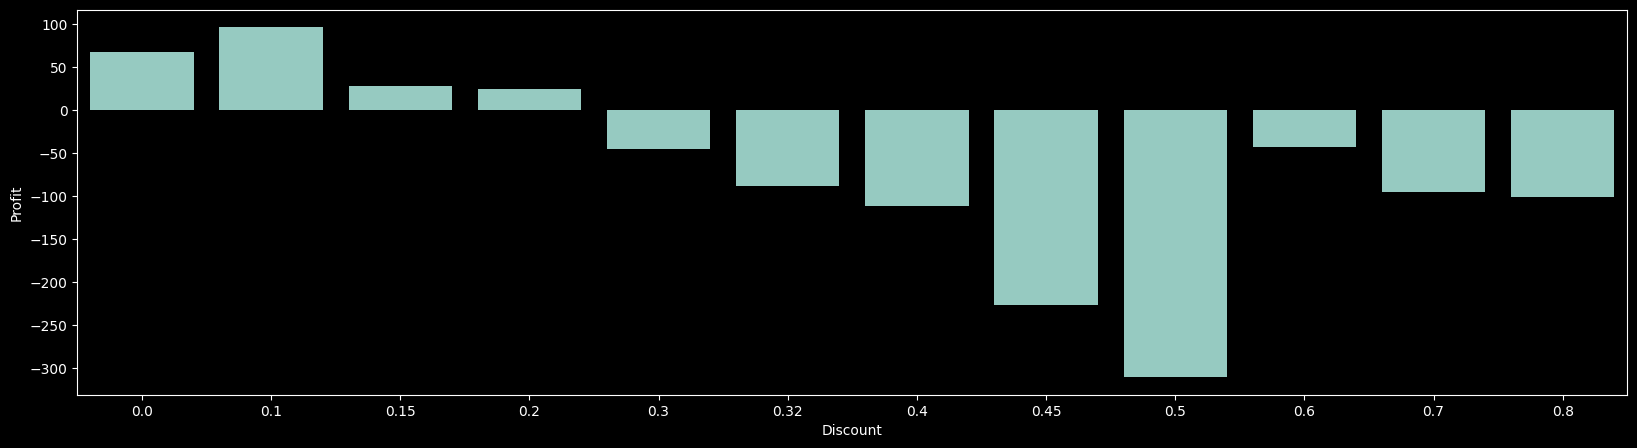

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use(['dark_background'])

df1 = df.groupby('Discount').Profit.mean().reset_index(name='Profit')
sns.barplot(x='Discount', y='Profit', data= df1)
plt.gcf().set_size_inches(20, 5)

총 판매금액, 이익, 마진률로 매출/수익 정보를 지표화하였고

각 항목별로 판매금액과 이익의 관계를 분석하여

할인률이 높을수록 마진률이 낮아지는 경향을 보이며

할인률이 30%가 넘어가면 이익이 손해가 된다는 결론을 도출하였다.

따라서 매출/수익의 더딘 성장은 30%이상의 높은 할인률

또는 30%이상의 할인률이 적용되는 상품의 수가 많아졌기 때문이라고 분석할 수 있다.